In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import Udacity_project as t
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

import seaborn as sns
%matplotlib inline

df = pd.read_csv('./survey_results_public_2020.csv')
#schema = pd.read_csv('./survey_results_public_schema_2020.csv') #question for each column
df.head()

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,...,NaN,NaN,No,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat less welcome now than last year,40.0,7,4
4,5,"I used to be a developer by profession, but no...",Yes,31.0,16,NaN,NaN,NaN,United States,NaN,...,Easy,Too short,No,"Computer science, computer engineering, or sof...",Django;Ruby on Rails,Ruby on Rails,Just as welcome now as I felt last year,NaN,15,8


**DATA PREPROCESSING**

In [8]:
#provide the number of rows and columns in the dataset
num_rows = df.shape[0] 
num_cols = df.shape[1]
num_rows
num_cols

61

In [9]:
#provide a set of columns with 0 missing values
no_nulls =set(df.columns[df.isnull().mean()==0])
no_nulls

{'Respondent'}

In [11]:
#proved a set of columns with more than 75% of the values missing
most_missing_cols = set(df.columns[df.isnull().mean()>0.25])
most_missing_cols

{'Age',
 'CompFreq',
 'CompTotal',
 'ConvertedComp',
 'CurrencyDesc',
 'CurrencySymbol',
 'DatabaseDesireNextYear',
 'Ethnicity',
 'JobSat',
 'MiscTechDesireNextYear',
 'MiscTechWorkedWith',
 'NEWCollabToolsDesireNextYear',
 'NEWDevOps',
 'NEWDevOpsImpt',
 'NEWJobHunt',
 'NEWJobHuntResearch',
 'NEWOnboardGood',
 'NEWOvertime',
 'NEWPurchaseResearch',
 'OrgSize',
 'PurchaseWhat',
 'SOPartFreq',
 'Sexuality',
 'WebframeDesireNextYear',
 'WebframeWorkedWith',
 'WorkWeekHrs',
 'YearsCodePro'}

Text(0.5, 1.0, 'MainBranch: Developer Professional')

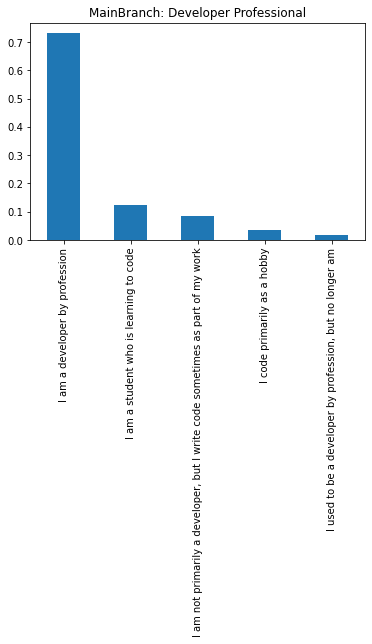

In [6]:
status_vals = df.MainBranch.value_counts() #provide a pandas series of the counts for each Main branch(professional status)

(status_vals/df.shape[0]).plot(kind="bar")
plt.title('MainBranch: Developer Professional')

Text(0.5, 1.0, 'Ed Level')

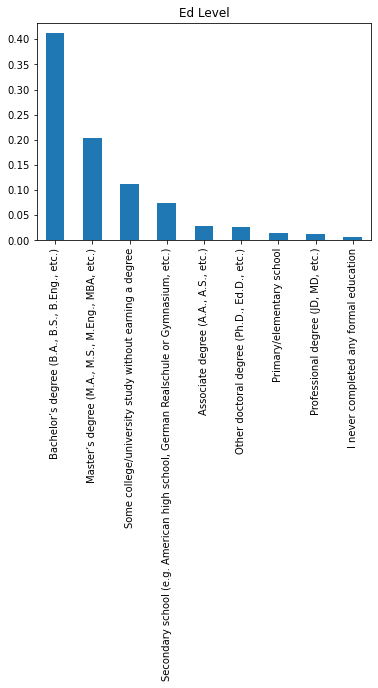

In [12]:
ed_vals = df.EdLevel.value_counts()#Provide a pandas series of the counts for each EdLevel status

(ed_vals/df.shape[0]).plot(kind="bar");
plt.title("Ed Level")

In [13]:
df.describe() #all the numeric columns and their statistics summary

,Respondent,Age,CompTotal,ConvertedComp,WorkWeekHrs
count,64461.000000,45446.000000,3.482600e+04,3.475600e+04,41151.000000
mean,32554.079738,30.834111,3.190464e+242,1.037561e+05,40.782174
std,18967.442360,9.585392,inf,2.268853e+05,17.816383
min,1.000000,1.000000,0.000000e+00,0.000000e+00,1.000000
25%,16116.000000,24.000000,2.000000e+04,2.464800e+04,40.000000
50%,32231.000000,29.000000,6.300000e+04,5.404900e+04,40.000000
75%,49142.000000,35.000000,1.250000e+05,9.500000e+04,44.000000
max,65639.000000,279.000000,1.111111e+247,2.000000e+06,475.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000010DA822CFD0>,
      dtype=object)

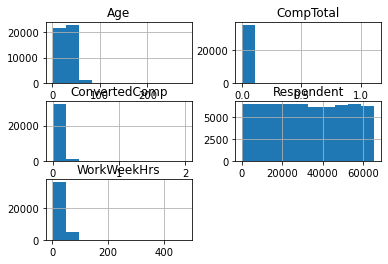

In [14]:
df.hist() #hist plot

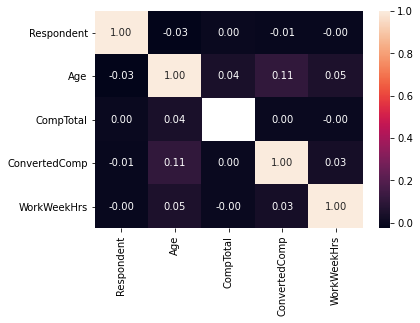

In [15]:
sns.heatmap(df.corr(), annot=True, fmt='.2f')

In [2]:
#X = df[['Age', 'ConvertedComp','WorkWeekHrs']]
#y = df['CompTotal']

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

#lm_model = LinearRegression(normalize=True)
#lm_model.fit(X_train, y_train)

In [16]:
df.shape

(64461, 61)

In [17]:
language1 = df['LanguageWorkedWith'].value_counts()
language1.head()

HTML/CSS;JavaScript;PHP;SQL              1073
HTML/CSS;JavaScript                       900
C#;HTML/CSS;JavaScript;SQL                856
C#;HTML/CSS;JavaScript;SQL;TypeScript     754
HTML/CSS;JavaScript;TypeScript            697
Name: LanguageWorkedWith, dtype: int64

In [18]:
language2 = df['LanguageDesireNextYear'].value_counts()
language2.head()

Python                            1152
Rust                               528
HTML/CSS;JavaScript;TypeScript     499
C#                                 461
Go                                 412
Name: LanguageDesireNextYear, dtype: int64

In [19]:
language3 = df['NEWLearn'].value_counts()
language3.head()

Every few months        20938
Once a year             20693
Once every few years    13284
Once a decade            1241
Name: NEWLearn, dtype: int64

In [20]:
#drop the NaN values
num_vars = df[['Age','CompTotal','ConvertedComp','WorkWeekHrs']]
df_dropna = num_vars.dropna(axis=0)

X = df_dropna[['Age','ConvertedComp','WorkWeekHrs']]
y = df_dropna['CompTotal']

#build the linear regression model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

lm_model = LinearRegression(normalize=True)
lm_model.fit(X_train, y_train)

#Model validation: 
y_test_preds = lm_model.predict(X_test)

print(r2_score(y_test, y_test_preds))
print(mean_squared_error(y_test, y_test_preds))

-2.0844157589456897e+76
1.784543165147552e+91


In [21]:
#(language1/df.shape[0]).plot(kind="bar")
#plt.title("the fariate language to work with")

In [22]:
#DATA CLEANING
#import Udacity_project as t
#def clean_and_plot(df,title='most language using', plot=True):
    '''
    INPUT
        df - a dataframe holding the LanguageWorkedWith column
        title - the title fo your plot
        axis - axis object
        plot - bool providing whether of not you want a plot back
        
    OUTPUT
        study_df - a dataframe with the count of how many individuals
        Display a plot of pretty things related to the LanguageWoredWith column
    '''
    #study = df['LanguageWorkedWith'].value_counts().reset_index()
    #study.rename(columns={'index':'method','LanguageWorkedWith':'count'}, inplace=True)
    #study.df = t.total_count(study,'method', 'count', possible_vals)
    
    #study_df.set_index('method', inplace=True)
    #if plot:
        #(study_df/study.df.sum()).plot(kind='bar');
        #plt.title(title);
        #plt.show()
    #props_study_df = study_df/study_df.sum()
    #return props_study_df

#props_df = clean_and_plot(df)

IndentationError: unexpected indent (<ipython-input-22-4a8d09507fe0>, line 4)